In [3]:
#ultimo enviado
#Tesis Maestria CD - Rocío CASTAÑO-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.neighbors import LocalOutlierFactor  
data = pd.read_csv('./Datos/Version2.csv')


x = data.iloc[:,:-1]
y = data.iloc[:,-1].values
data.head(10)
data.shape

(3908, 23)

In [2]:
#ANALISIS EXPLORATORIO DE DATOS
#columnas_seleccionadas = data[['SubRubro', 'Rubro','Clasificacion','Subclasificacion']]
#print(columnas_seleccionadas.head(10))
#print(data.loc[:9, ['SubRubro', 'Rubro','Clasificacion','Subclasificacion']])
#tabla = data[['SubRubro', 'Rubro','Clasificacion','Subclasificacion']].head(5)

# Imprimir la 
#print(tabulate(tabla, headers=tabla.columns, tablefmt='psql'))
#print(tabla.head())
pd.set_option('display.max_columns', None)
data.head()


,ProductoCodigo,Nombre,ImpuestoId,Impuesto,Descripcion,Activo,CuentaContableCodigo,CuentaContable,SubRubroCodigo,SubRubro,RubroCodigo,Rubro,SubclasificacionCodigo,Subclasificacion,ClasificacionCodigo,Clasificacion,UnidadCodigo,Unidad,PrecioVenta,Stock,MovimientosStock,MovimientoCantidad,ImporteCompra
0,357,BATERIAS,1,IVA 21,BATERIAS DE VEHICULOS,1,10478,REPARACION Y MANTENIMIENTO DE RODADOS,28,BATERÍAS AUTOMOTICES,15,BATERÍAS,7,ENERGÍA,1,CABLES Y ENERGÍA,1,UNIDAD,NaN,3,NaN,NaN,"69670,0014"
1,361,MATERIALES,1,IVA 21,MATERIALES PARA EL AREA DE PRODUCCION,1,10422,MATERIALES COMUNICACIÓN,71,ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR,37,ROUTERS,6,EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN,3,EQUIPAMIENTO DE REDES/COMUNICACIONES,1,UNIDAD,NaN,1,NaN,NaN,"14504,262"
2,364,ROPA DE TRABAJO,1,IVA 21,NaN,1,10372,ROPA DE TRABAJO,76,EQUIPAMIENTO Y MATERIALES AUDIO,39,EQUIPAMIENTO AUDIO,16,EQUIPAMIENTO TV/RADIO,4,BIENES E INSUMOS MATERIALES,1,UNIDAD,NaN,10,NaN,NaN,"809293,3516"
3,372,COMBUSTIBLES Y LUBRICANTES,1,IVA 21,COMBUSTIBLES Y LUBRINCANTES.,1,10415,COMBUSTIBLES Y LUBRICANTES,159,REPARACIÓN Y MANTENIMIENTO RODADOS,85,REPARACIÓN Y MANTENIMIENTO RODADOS,31,SERVICIOS DE REPARACIÓN Y MANTENIMIENTO,8,SERVICIOS GENERALES,1,UNIDAD,NaN,12,NaN,NaN,"71329,4947"
4,373,MATERIALES ELECTRICOS,1,IVA 21,NaN,0,10420,MATERIALES ELECTRICOS,70,MATERIALES DE CONEXIONES VARIOS,36,ANTENAS Y ACCESORIOS,6,EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN,3,EQUIPAMIENTO DE REDES/COMUNICACIONES,1,UNIDAD,NaN,1,0.0,0.0,"41655,0988"


In [3]:
data.shape

(3908, 23)

In [ ]:
#ANALISIS EXPLORATORIO DE DATOS

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

# Descargar stopwords 
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    if pd.isna(texto):
        return ""
    texto = texto.upper()  # Convertir a mayúsculas
    texto = re.sub(r'\d+', '', texto)  # Eliminar números
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar signos de puntuación
    texto = re.sub(r'\s+', ' ', texto).strip()  # Eliminar espacios redundantes
    palabras = texto.split()
    palabras = [p for p in palabras if p not in stop_words]  # Remover stop-words
    return ' '.join(palabras)

def generar_ngrams(texto, n):
    palabras = texto.split()
    return [" ".join(ng) for ng in ngrams(palabras, n)]



# Aplicar limpieza de datos
data['Nombre_Limpio'] = data['Nombre'].apply(limpiar_texto)
data['Descripcion_Limpia'] = data['Descripcion'].apply(limpiar_texto)

# Generar n-gramas
data['Monogramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 1))
data['Bigramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 2))
data['Trigramas'] = data['Nombre_Limpio'].apply(lambda x: generar_ngrams(x, 3))

# Mostrar resultado
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,[MATERIALES],[],[]
2,ROPA DE TRABAJO,ROPA DE TRABAJO,"[ROPA, DE, TRABAJO]","[ROPA DE, DE TRABAJO]",[ROPA DE TRABAJO]
3,COMBUSTIBLES Y LUBRICANTES,COMBUSTIBLES Y LUBRICANTES,"[COMBUSTIBLES, Y, LUBRICANTES]","[COMBUSTIBLES Y, Y LUBRICANTES]",[COMBUSTIBLES Y LUBRICANTES]
4,MATERIALES ELECTRICOS,MATERIALES ELECTRICOS,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]


In [9]:
# Mostrar resultado
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR DE PIZARRA CON MARCADORES,"[BORRADOR, DE, PIZARRA, CON, MARCADORES]","[BORRADOR DE, DE PIZARRA, PIZARRA CON, CON MAR...","[BORRADOR DE PIZARRA, DE PIZARRA CON, PIZARRA ..."
3907,PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V,PROTECTOR ALTA Y BAJA TENSION DIGITAL A V,"[PROTECTOR, ALTA, Y, BAJA, TENSION, DIGITAL, A...","[PROTECTOR ALTA, ALTA Y, Y BAJA, BAJA TENSION,...","[PROTECTOR ALTA Y, ALTA Y BAJA, Y BAJA TENSION..."


In [6]:
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']]

,Nombre,Nombre_Limpio,Monogramas,Bigramas,Trigramas
0,BATERIAS,BATERIAS,[BATERIAS],[],[]
1,MATERIALES,MATERIALES,[MATERIALES],[],[]
2,ROPA DE TRABAJO,ROPA DE TRABAJO,"[ROPA, DE, TRABAJO]","[ROPA DE, DE TRABAJO]",[ROPA DE TRABAJO]
3,COMBUSTIBLES Y LUBRICANTES,COMBUSTIBLES Y LUBRICANTES,"[COMBUSTIBLES, Y, LUBRICANTES]","[COMBUSTIBLES Y, Y LUBRICANTES]",[COMBUSTIBLES Y LUBRICANTES]
4,MATERIALES ELECTRICOS,MATERIALES ELECTRICOS,"[MATERIALES, ELECTRICOS]",[MATERIALES ELECTRICOS],[]
...,...,...,...,...,...
3903,SMARTWATCH NM-PLUS BT,SMARTWATCH NMPLUS BT,"[SMARTWATCH, NMPLUS, BT]","[SMARTWATCH NMPLUS, NMPLUS BT]",[SMARTWATCH NMPLUS BT]
3904,ETHERNET ADAPTADOR STARLINK,ETHERNET ADAPTADOR STARLINK,"[ETHERNET, ADAPTADOR, STARLINK]","[ETHERNET ADAPTADOR, ADAPTADOR STARLINK]",[ETHERNET ADAPTADOR STARLINK]
3905,PIZARRA BLANCA MARCO ALUMINIO,PIZARRA BLANCA MARCO ALUMINIO,"[PIZARRA, BLANCA, MARCO, ALUMINIO]","[PIZARRA BLANCA, BLANCA MARCO, MARCO ALUMINIO]","[PIZARRA BLANCA MARCO, BLANCA MARCO ALUMINIO]"
3906,BORRADOR DE PIZARRA CON 3 MARCADORES,BORRADOR DE PIZARRA CON MARCADORES,"[BORRADOR, DE, PIZARRA, CON, MARCADORES]","[BORRADOR DE, DE PIZARRA, PIZARRA CON, CON MAR...","[BORRADOR DE PIZARRA, DE PIZARRA CON, PIZARRA ..."


In [ ]:
# Mostrar resultado
data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].tail()

In [10]:
# Generar n-gramas
data['MonogramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 1))
data['BigramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 2))
data['TrigramasD'] = data['Descripcion_Limpia'].apply(lambda x: generar_ngrams(x, 3))

data[['Descripcion', 'Descripcion_Limpia', 'MonogramasD', 'BigramasD', 'TrigramasD']].tail()

,Descripcion,Descripcion_Limpia,MonogramasD,BigramasD,TrigramasD
3903,relojes digitales para Donacion TK 21216/2024,RELOJES DIGITALES PARA DONACION TK,"[RELOJES, DIGITALES, PARA, DONACION, TK]","[RELOJES DIGITALES, DIGITALES PARA, PARA DONAC...","[RELOJES DIGITALES PARA, DIGITALES PARA DONACI..."
3904,NaN,,[],[],[]
3905,NaN,,[],[],[]
3906,NaN,,[],[],[]
3907,NaN,,[],[],[]


In [7]:
#Analisis de frecuencia - metricas
# Calcular frecuencia de términos
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
#Contar la aparición de palabras clave en el dataset
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Calcular TF-IDF : Calcular la importancia de cada término en el contexto del dataset
tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostrar resultado
#data[['Nombre', 'Nombre_Limpio', 'Monogramas', 'Bigramas', 'Trigramas']].head(), 
frecuencia_terminos,
#tfidf_dataframe.head()


(Counter({'BATERIAS': 8,
          'MATERIALES': 11,
          'ROPA': 2,
          'DE': 581,
          'TRABAJO': 4,
          'COMBUSTIBLES': 1,
          'Y': 30,
          'LUBRICANTES': 1,
          'ELECTRICOS': 2,
          'COMUNICACION': 2,
          'COMUNICACIÓN': 1,
          'AL': 21,
          'RESMAS': 1,
          'PAPELERÍA': 1,
          'FERRETERÍA': 1,
          'ART': 2,
          'LIBRERIA': 3,
          'TONER': 45,
          'NODO': 33,
          'TORRES': 2,
          'MET': 3,
          'MANO': 29,
          'OBRA': 6,
          'POSTES': 3,
          'MADERA': 18,
          'COMPUTACION': 1,
          'TOKEN': 1,
          'ROUTERS': 1,
          'C': 48,
          'FUENTE': 58,
          'PESCENOGRAFIA': 1,
          'CANAL': 12,
          'COMPUTADORAS': 4,
          'PARA': 201,
          'LA': 12,
          'VENTA': 5,
          'P': 87,
          'ANTENA': 14,
          'PANEL': 34,
          'MIKROTIK': 9,
          'SOPORTE': 37,
          'CIBEREGURI

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer


# Calcular frecuencia de términos
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        if pd.notna(texto):
            frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Filtrar términos poco frecuentes (apariciones menores a 3 veces)
umbral_frecuencia =3
terminos_frecuentes = {t for t, f in frecuencia_terminos.items() if f >= umbral_frecuencia}

def filtrar_terminos_poco_frecuentes(texto):
    if pd.isna(texto):
        return ""
    palabras = texto.split()
    palabras = [p for p in palabras if p in terminos_frecuentes]
    return ' '.join(palabras)

data['Nombre_Limpio'] = data['Nombre_Limpio'].apply(filtrar_terminos_poco_frecuentes)

# Mostrar términos filtrados
frecuencia_terminos

Counter({'BATERIAS': 8,
         'MATERIALES': 11,
         'ROPA': 2,
         'DE': 581,
         'TRABAJO': 4,
         'COMBUSTIBLES': 1,
         'Y': 30,
         'LUBRICANTES': 1,
         'ELECTRICOS': 2,
         'COMUNICACION': 2,
         'COMUNICACIÓN': 1,
         'AL': 21,
         'RESMAS': 1,
         'PAPELERÍA': 1,
         'FERRETERÍA': 1,
         'ART': 2,
         'LIBRERIA': 3,
         'TONER': 45,
         'NODO': 33,
         'TORRES': 2,
         'MET': 3,
         'MANO': 29,
         'OBRA': 6,
         'POSTES': 3,
         'MADERA': 18,
         'COMPUTACION': 1,
         'TOKEN': 1,
         'ROUTERS': 1,
         'C': 48,
         'FUENTE': 58,
         'PESCENOGRAFIA': 1,
         'CANAL': 12,
         'COMPUTADORAS': 4,
         'PARA': 201,
         'LA': 12,
         'VENTA': 5,
         'P': 87,
         'ANTENA': 14,
         'PANEL': 34,
         'MIKROTIK': 9,
         'SOPORTE': 37,
         'CIBEREGURIDAD': 1,
         'ELECTRODOMÉSTICOS': 1,


In [5]:
#ordenados descendente

# Calcular frecuencia de términos
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        if pd.notna(texto):
            frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Nombre_Limpio'])

# Ordenar términos por frecuencia en orden descendente
frecuencia_terminos_ordenados = dict(sorted(frecuencia_terminos.items(), key=lambda item: item[1], reverse=True))

# Filtrar términos poco frecuentes (apariciones menores a 3 veces)
umbral_frecuencia = 3
terminos_frecuentes = {t for t, f in frecuencia_terminos.items() if f >= umbral_frecuencia}

def filtrar_terminos_poco_frecuentes(texto):
    if pd.isna(texto):
        return ""
    palabras = texto.split()
    palabras = [p for p in palabras if p in terminos_frecuentes]
    return ' '.join(palabras)

data['Nombre_Limpio'] = data['Nombre_Limpio'].apply(filtrar_terminos_poco_frecuentes)

# Mostrar términos filtrados ordenados por frecuencia
frecuencia_terminos_ordenados


{'DE': 581,
 'MM': 437,
 'X': 402,
 'A': 232,
 'CABLE': 213,
 'PARA': 201,
 'M': 138,
 'V': 126,
 'FIBRA': 124,
 'MTS': 118,
 'MOD': 115,
 'PATCH': 109,
 'GB': 108,
 'CORD': 98,
 'CAT': 95,
 'DISCO': 91,
 'W': 90,
 'PROYECTO': 90,
 'P': 87,
 'CAJA': 83,
 'G': 80,
 'ANR': 80,
 'LLAVE': 73,
 'PVC': 70,
 'KIT': 67,
 'CM': 65,
 'E': 63,
 'HP': 60,
 'FUENTE': 58,
 'NOTEBOOK': 58,
 'N': 57,
 'CON': 56,
 'BATERIA': 56,
 'NEGRO': 55,
 'FO': 55,
 'RAEES': 54,
 'LED': 53,
 'USB': 53,
 'PLACA': 53,
 'Nº': 51,
 'PINZA': 49,
 'C': 48,
 'RJ': 48,
 'SFP': 48,
 'AC': 46,
 'TONER': 45,
 'UTP': 45,
 'I': 42,
 'SWITCH': 42,
 'GHZ': 40,
 'XMM': 40,
 'CAÑO': 40,
 'SSD': 39,
 'MEMORIA': 38,
 'CAMARA': 38,
 'SOPORTE': 37,
 'MECHA': 37,
 'GABINETE': 36,
 'PUNTA': 36,
 'TIPO': 36,
 'CONECTOR': 36,
 'RACK': 35,
 'MODULO': 35,
 'RIGIDO': 35,
 'TB': 35,
 'MONITOR': 35,
 'PANEL': 34,
 'NODO': 33,
 'UPS': 33,
 'T': 33,
 'CORE': 33,
 'S': 32,
 'TAPA': 32,
 'LT': 31,
 'Y': 30,
 'TERMINAL': 30,
 'DDR': 30,
 'KM': 30,


In [7]:
#ordenados descendente por desccripcion

# Calcular frecuencia de términos
def calcular_frecuencia(lista_textos):
    frecuencia = Counter()
    for texto in lista_textos:
        if pd.notna(texto):
            frecuencia.update(texto.split())
    return frecuencia

frecuencia_terminos = calcular_frecuencia(data['Descripcion_Limpia'])

# Ordenar términos por frecuencia en orden descendente
frecuencia_terminos_ordenados = dict(sorted(frecuencia_terminos.items(), key=lambda item: item[1], reverse=True))

# Filtrar términos poco frecuentes (apariciones menores a 3 veces)
umbral_frecuencia = 3
terminos_frecuentes = {t for t, f in frecuencia_terminos.items() if f >= umbral_frecuencia}

def filtrar_terminos_poco_frecuentes(texto):
    if pd.isna(texto):
        return ""
    palabras = texto.split()
    palabras = [p for p in palabras if p in terminos_frecuentes]
    return ' '.join(palabras)

data['Descripcion_Limpia'] = data['Descripcion_Limpia'].apply(filtrar_terminos_poco_frecuentes)

# Mostrar términos filtrados ordenados por frecuencia
frecuencia_terminos_ordenados

{'DE': 160,
 'X': 123,
 'MM': 116,
 'CABLE': 85,
 'PARA': 80,
 'FIBRA': 59,
 'GB': 58,
 'PATCH': 56,
 'INALAMBRICO': 39,
 'A': 33,
 'CAÑOS': 32,
 'DDR': 32,
 'PINTURA': 31,
 'PVC': 30,
 'CAJA': 28,
 'MTS': 27,
 'MODELO': 25,
 'UTP': 25,
 'ROUTER': 25,
 'G': 25,
 'W': 25,
 'Y': 24,
 'CON': 23,
 'FUENTE': 23,
 'P': 23,
 'SFP': 23,
 'C': 22,
 'TV': 21,
 'SSD': 21,
 'LLAVE': 21,
 'INTERRUPTOR': 21,
 'SWITCH': 20,
 'XA': 20,
 'UPS': 19,
 'RIGIDA': 19,
 'PINZA': 19,
 'MEMORIA': 19,
 'I': 18,
 'S': 18,
 'TORNILLO': 18,
 'NOTEBOOK': 18,
 'V': 18,
 'SOPORTE': 17,
 'CABLECANAL': 17,
 'CONECTOR': 17,
 'TRANSCEIVER': 17,
 'M': 17,
 'SUBTERRANEO': 16,
 'DISCO': 16,
 'PROCESADOR': 16,
 'NEGRO': 15,
 'GABINETE': 15,
 'AL': 14,
 'TIPO': 14,
 'USB': 14,
 'INTEL': 14,
 'TERMOMAGNETICO': 14,
 'FICHA': 14,
 'BATERIA': 14,
 'LA': 13,
 'PLASTICO': 13,
 'FO': 13,
 'ADHESIVO': 13,
 'TERMINAL': 13,
 'ZAPATOS': 13,
 'HOSPITAL': 13,
 'JUNIO': 13,
 'MECHAS': 12,
 'MOD': 12,
 'RACK': 11,
 'MONITOR': 11,
 'MHZ': 11

In [11]:
#LabelEncoder:Como SubRubro es categórica , debe codificarse como números, usando LabelEncoder.
from sklearn.preprocessing import LabelEncoder

# Instanciar el codificador
le = LabelEncoder()

# Codificar la variable 'SubRubro'
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])

# Ver las primeras codificaciones como referencia
print(data[['SubRubro', 'SubRubro_encoded']].drop_duplicates())

# Variable objetivo (target) para los modelos
y = data['SubRubro_encoded']



                                               SubRubro  SubRubro_encoded
0                                  BATERÍAS AUTOMOTICES                11
1              ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR               102
2                       EQUIPAMIENTO Y MATERIALES AUDIO                49
3                    REPARACIÓN Y MANTENIMIENTO RODADOS                99
4                       MATERIALES DE CONEXIONES VARIOS                65
...                                                 ...               ...
3801  SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...               106
3822                                 LICENCIAS SOFTWARE                61
3835                                            METALES                70
3838                                           PLASTICO                93
3839                                        COMPONENTES                37

[116 rows x 2 columns]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calcular TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])

# Convertir a DataFrame
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Verificar que existe y está correcto
print(tfidf_dataframe.head())


    aa  aaa   ab  abapsar  abb  abc  abierta  abierto  abonada  aborigen  ...  \
0  0.0  0.0  0.0      0.0  0.0  0.0      0.0      0.0      0.0       0.0  ...   
1  0.0  0.0  0.0      0.0  0.0  0.0      0.0      0.0      0.0       0.0  ...   
2  0.0  0.0  0.0      0.0  0.0  0.0      0.0      0.0      0.0       0.0  ...   
3  0.0  0.0  0.0      0.0  0.0  0.0      0.0      0.0      0.0       0.0  ...   
4  0.0  0.0  0.0      0.0  0.0  0.0      0.0      0.0      0.0       0.0  ...   

   zinc  zkteco   zn  zocalo  zplus  zte  ztt  zunchadora   zx  óptica  
0   0.0     0.0  0.0     0.0    0.0  0.0  0.0         0.0  0.0     0.0  
1   0.0     0.0  0.0     0.0    0.0  0.0  0.0         0.0  0.0     0.0  
2   0.0     0.0  0.0     0.0    0.0  0.0  0.0         0.0  0.0     0.0  
3   0.0     0.0  0.0     0.0    0.0  0.0  0.0         0.0  0.0     0.0  
4   0.0     0.0  0.0     0.0    0.0  0.0  0.0         0.0  0.0     0.0  

[5 rows x 3610 columns]


In [13]:
# 1. Vectorización TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matriz = tfidf_vectorizer.fit_transform(data['Nombre_Limpio'])
tfidf_dataframe = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF shape:", tfidf_dataframe.shape)

# 2. Codificación de SubRubro
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['SubRubro_encoded'] = le.fit_transform(data['SubRubro'])


TF-IDF shape: (3908, 3610)


In [ ]:
# Hasta aca tengo :
tfidf_dataframe #como X (features vectorizadas).

y = SubRubro_encoded 3como target.

In [ ]:
#ahora modelado y analsis comparativo


In [14]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# Variables
X = tfidf_dataframe
y = data['SubRubro_encoded']

#***********agrego esto porque daba error

# Contar cuántas veces aparece cada clase
conteo_clases = data['SubRubro_encoded'].value_counts()

# Filtrar para quedarnos solo con las clases que tienen al menos 2 productos
clases_validas = conteo_clases[conteo_clases >= 2].index

# Filtrar el dataset
data_filtrado = data[data['SubRubro_encoded'].isin(clases_validas)]

# *** NUEVO: Reasignar etiquetas consecutivas ***
le2 = LabelEncoder()
data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])
# SubRubro_encoded_relabel es una nueva columna con las etiquetas consecutivas correctas.

# Redefinir X e y
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']  # Ahora usamos la versión "relabel"
#**********************************************


# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Cuando pones stratify=y, garantizas que todas las clases estén en la misma proporción tanto en train como en test.
#Así XGBoost no da error.

# Definir todas las clases posibles (importante para XGBoost)
todas_las_clases = np.unique(y)


# Definir modelos
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(todas_las_clases)),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}


# 5. Definir modelos
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(np.unique(y))),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# 6. Inicializar lista para resultados
resultados = []

# 7. Entrenar, medir tiempos y almacenar métricas
for nombre, modelo in modelos.items():
    print(f"Modelo: {nombre}")
    
    inicio = time.time()
    modelo.fit(X_train, y_train)
    fin = time.time()

    tiempo_entrenamiento = fin - inicio
    
    y_pred = modelo.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    resultados.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'F1-Score': f1,
        'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
    })

    print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-"*60)

# 8. Crear DataFrame de resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar tabla final
print("\nTabla resumen de resultados:")
print(resultados_df)

# 9. Gráfico de barras para comparación

# Configuración de estilo
plt.figure(figsize=(14, 8))
sns.barplot(x='Accuracy', y='Modelo', data=resultados_df, ci=None)
plt.title('Comparación de Accuracy por Modelo', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='F1-Score', y='Modelo', data=resultados_df, ci=None)
plt.title('Comparación de F1-Score por Modelo', fontsize=16)
plt.xlabel('F1-Score')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_df, ci=None)
plt.title('Comparación de Tiempo de Entrenamiento por Modelo', fontsize=16)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Modelos')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

    #Aqui me dio error porque algunas clases Tienes clases en SubRubro_encoded que solo tienen 1 ejemplo.
 #Cuando pides stratify=y, Sklearn necesita mínimo 2 muestras por clase para poder dividir entre train y test.
 #No se puede dividir 1 solo dato en train/test, por eso explota.
     #Tu dataset tiene algunos subrubros muy raros o casi vacíos (con 1 solo producto).
 #Esto complica el modelado porque no se puede entrenar ni testear bien con una clase así.
#entonces debi eliminar el dataset aquellas clases (SubRubro_encoded) que tienen menos de 2 ejemplos


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\3433086634.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrado['SubRubro_encoded_relabel'] = le2.fit_transform(data_filtrado['SubRubro_encoded'])


Modelo: Naive Bayes
Tiempo de entrenamiento: 1.52 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.73      0.71      0.72        34
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       1.00      0.08      0.15        12
           8       0.91      0.55      0.69        38
          11       0.00      0.00      0.00         3
          12       0.67      0.25      0.36         8
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      0.20      0.33        10
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 17.14 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.71      0.74      0.72        34
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       1.00      0.67      0.80         3
           7       1.00      0.50      0.67        12
           8       0.90      0.68      0.78        38
          11       1.00      0.33      0.50         3
          12       0.60      0.38      0.46         8
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.89      0.80      0.84        10
          16       0.50      0.50      0.50         2
          17       0.00      0.00      0.00         2
          19      

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 21.50 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.50      0.61        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.81      0.76      0.79        34
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67        12
           8       0.83      0.63      0.72        38
          11       0.67      0.67      0.67         3
          12       0.55      0.75      0.63         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.75      0.90      0.82        10
          16       0.33      0.50      0.40         2
          17       0.50      0.50      0.50         2
          19      

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 1582.04 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.21      0.29        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.76      0.65      0.70        34
           4       1.00      0.25      0.40         4
           5       0.67      1.00      0.80         2
           6       0.50      0.67      0.57         3
           7       0.71      0.42      0.53        12
           8       0.66      0.50      0.57        38
          11       0.00      0.00      0.00         3
          12       0.45      0.62      0.53         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.88      0.70      0.78        10
          16       0.00      0.00      0.00         2
          17       0.25      0.50      0.33         2
          19    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KeyboardInterrupt: 

Modelo con PCA: Logistic Regression
Tiempo de entrenamiento: 0.38 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.59      0.65      0.62        34
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.71      0.42      0.53        12
           8       0.88      0.39      0.55        38
          11       0.00      0.00      0.00         3
          12       0.44      0.50      0.47         8
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.67      0.80      0.73        10
          16       0.00      0.00      0.00         2
          17       0.50      0.50    

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Tiempo de entrenamiento: 8.06 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.61      0.68      0.64        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.75      0.50      0.60        12
           8       0.81      0.66      0.72        38
          11       0.50      0.67      0.57         3
          12       0.45      0.62      0.53         8
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.89      0.80      0.84        10
          16       0.00      0.00      0.00         2
          17       0.33      0.50      0.40         2
          19       

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 12.07 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.73      0.71      0.72        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.55      0.50      0.52        12
           8       0.78      0.66      0.71        38
          11       0.50      0.67      0.57         3
          12       0.50      0.62      0.56         8
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       0.89      0.80      0.84        10
          16       0.00      0.00      0.00         2
          17       0.33      0.50      0.40         2
          19      

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packag

Tiempo de entrenamiento: 2.49 segundos
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.67      0.65      0.66        34
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.86      0.50      0.63        12
           8       0.79      0.39      0.53        38
          11       0.33      0.33      0.33         3
          12       0.36      0.50      0.42         8
          13       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         1
          15       0.75      0.90      0.82        10
          16       1.00      0.50      0.67         2
          17       0.33      0.50      0.40         2
          19       

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\lib\sit

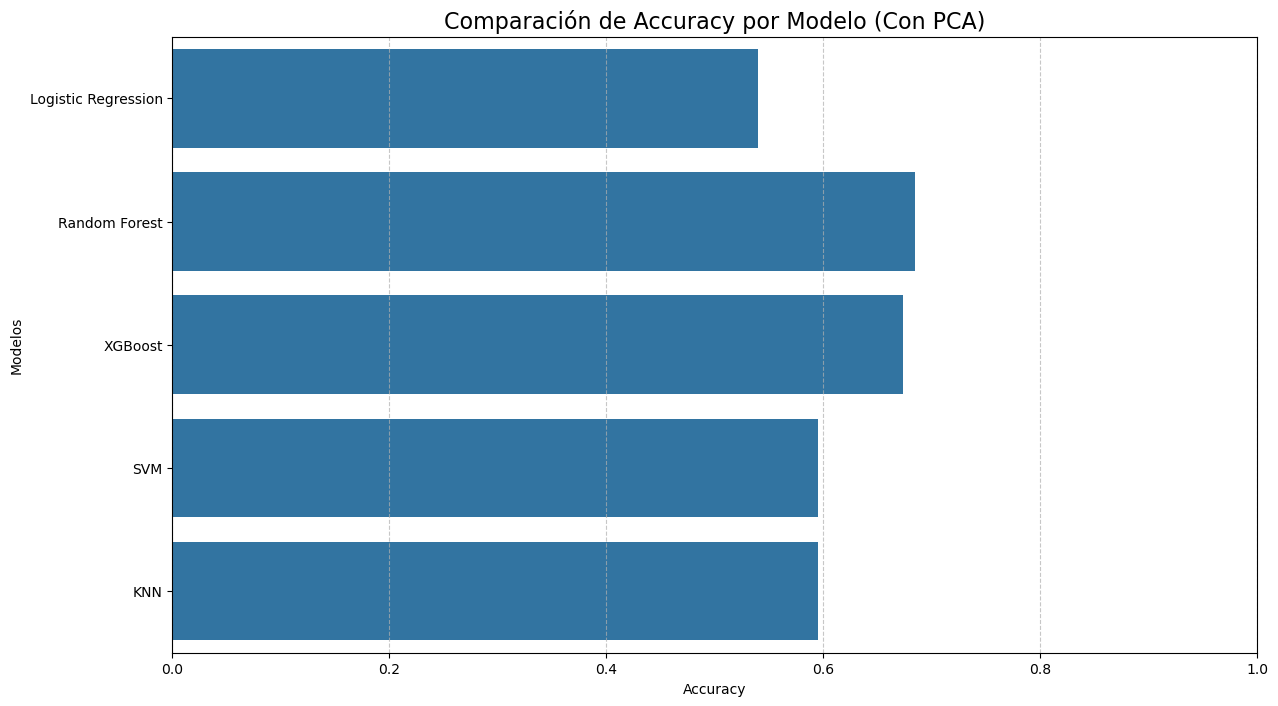

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8456\249955155.py:92: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='F1-Score', y='Modelo', data=resultados_pca_df, ci=None)


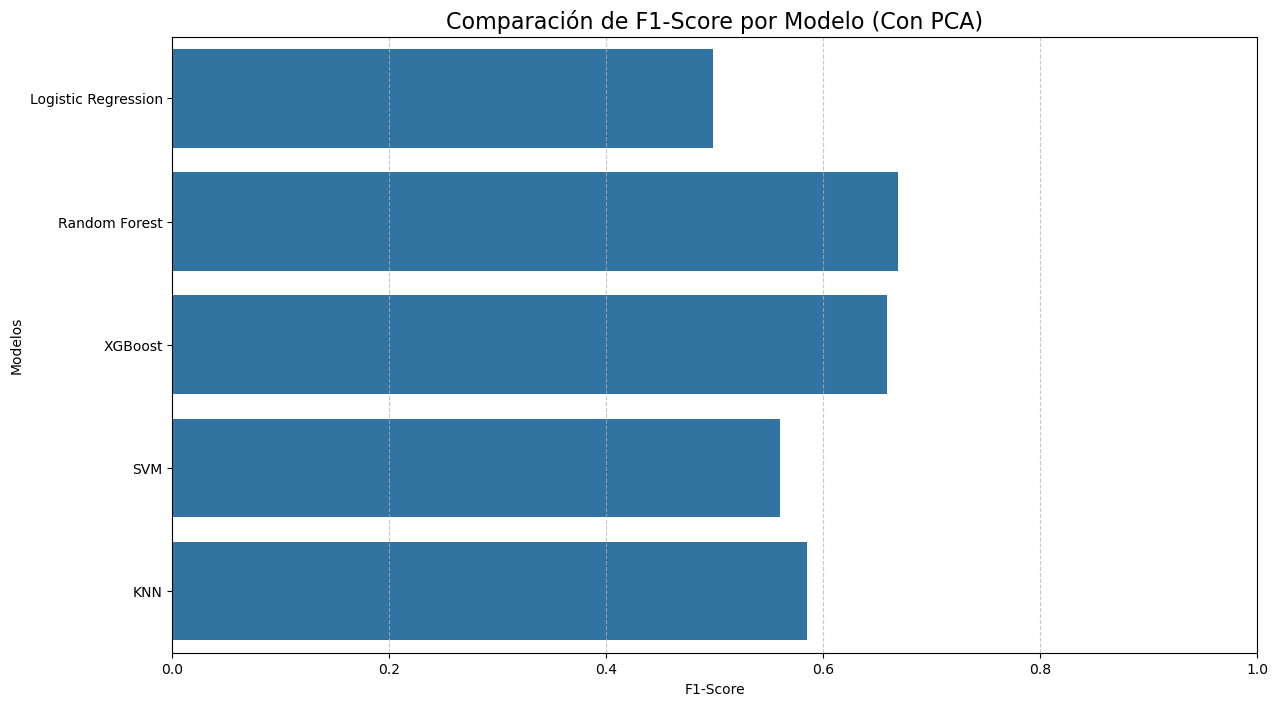

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8456\249955155.py:101: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_pca_df, ci=None)


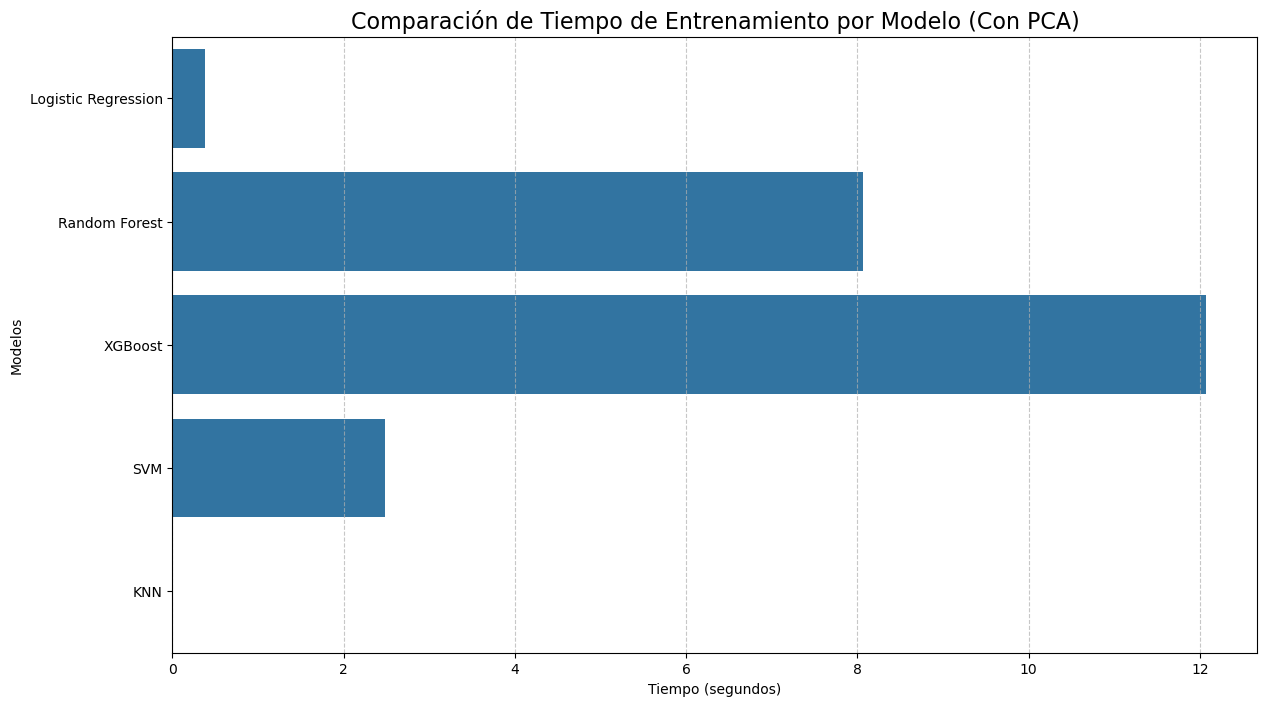

In [21]:
#aplicar PCA y comparar
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#Luego, cuando filtramos las clases con ≥2 ejemplos, algunas etiquetas desaparecieron 
#XGBoost no tolera esos saltos.Hay que relabel las clases después de filtrar para que sean continuas (0, 1, 2, 3, 4, 5,...).
#volver a usar LabelEncoder después de filtrar.
from sklearn.preprocessing import LabelEncoder

# 1. Aplicar PCA para reducir dimensiones
# (Elegimos reducir a 100 componentes, o puedes ajustar este número)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# 2. Separar train/test sobre los datos reducidos
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Definir los mismos modelos
# Definir los modelos para CON PCA (sin MultinomialNB)
#significa que PCA generó valores negativos en X_train_pca,
#y el modelo MultinomialNB no puede trabajar con valores negativos.
modelos_pca = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=len(np.unique(y))),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# 4. Inicializar lista para resultados
resultados_pca = []

# 5. Entrenar, medir tiempos y almacenar métricas (CON PCA)
for nombre, modelo in modelos_pca.items():
    print(f"Modelo con PCA: {nombre}")
    
    inicio = time.time()
    modelo.fit(X_train_pca, y_train_pca)
    fin = time.time()

    tiempo_entrenamiento = fin - inicio
    
    y_pred = modelo.predict(X_test_pca)
    
    acc = accuracy_score(y_test_pca, y_pred)
    f1 = f1_score(y_test_pca, y_pred, average='weighted')

    resultados_pca.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'F1-Score': f1,
        'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
    })

    print(f"Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
    print("Classification Report:")
    print(classification_report(y_test_pca, y_pred))
    print("-"*60)

# 6. Crear DataFrame de resultados (CON PCA)
resultados_pca_df = pd.DataFrame(resultados_pca)

# Mostrar tabla final
print("\nTabla resumen de resultados (con PCA):")
print(resultados_pca_df)

# 7. Gráficos de comparación CON PCA

plt.figure(figsize=(14, 8))
sns.barplot(x='Accuracy', y='Modelo', data=resultados_pca_df, ci=None)
plt.title('Comparación de Accuracy por Modelo (Con PCA)', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='F1-Score', y='Modelo', data=resultados_pca_df, ci=None)
plt.title('Comparación de F1-Score por Modelo (Con PCA)', fontsize=16)
plt.xlabel('F1-Score')
plt.ylabel('Modelos')
plt.xlim(0, 1)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', data=resultados_pca_df, ci=None)
plt.title('Comparación de Tiempo de Entrenamiento por Modelo (Con PCA)', fontsize=16)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Modelos')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#usionar resultados y graficar comparación
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# 1. Agregar una columna para identificar si es "Sin PCA" o "Con PCA"
resultados_df['Tipo'] = 'Sin PCA'
resultados_pca_df['Tipo'] = 'Con PCA'

# 2. Juntar ambos DataFrames
comparacion_total = pd.concat([resultados_df, resultados_pca_df])

# 3. Mostrar la tabla comparativa final
print("\nTabla Comparativa Final:")
print(comparacion_total)

# 4. Gráfico de comparación Accuracy

plt.figure(figsize=(16,10))
sns.barplot(x='Accuracy', y='Modelo', hue='Tipo', data=comparacion_total, ci=None)
plt.title('Comparación de Accuracy: Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Accuracy')
plt.ylabel('Modelo')
plt.xlim(0, 1)
plt.legend(title='Tipo de Modelado')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 5. Gráfico de comparación F1-Score

plt.figure(figsize=(16,10))
sns.barplot(x='F1-Score', y='Modelo', hue='Tipo', data=comparacion_total, ci=None)
plt.title('Comparación de F1-Score: Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('F1-Score')
plt.ylabel('Modelo')
plt.xlim(0, 1)
plt.legend(title='Tipo de Modelado')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

# 6. Gráfico de comparación Tiempo de Entrenamiento

plt.figure(figsize=(16,10))
sns.barplot(x='Tiempo de Entrenamiento (s)', y='Modelo', hue='Tipo', data=comparacion_total, ci=None)
plt.title('Comparación de Tiempos de Entrenamiento: Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Modelo')
plt.legend(title='Tipo de Modelado')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()


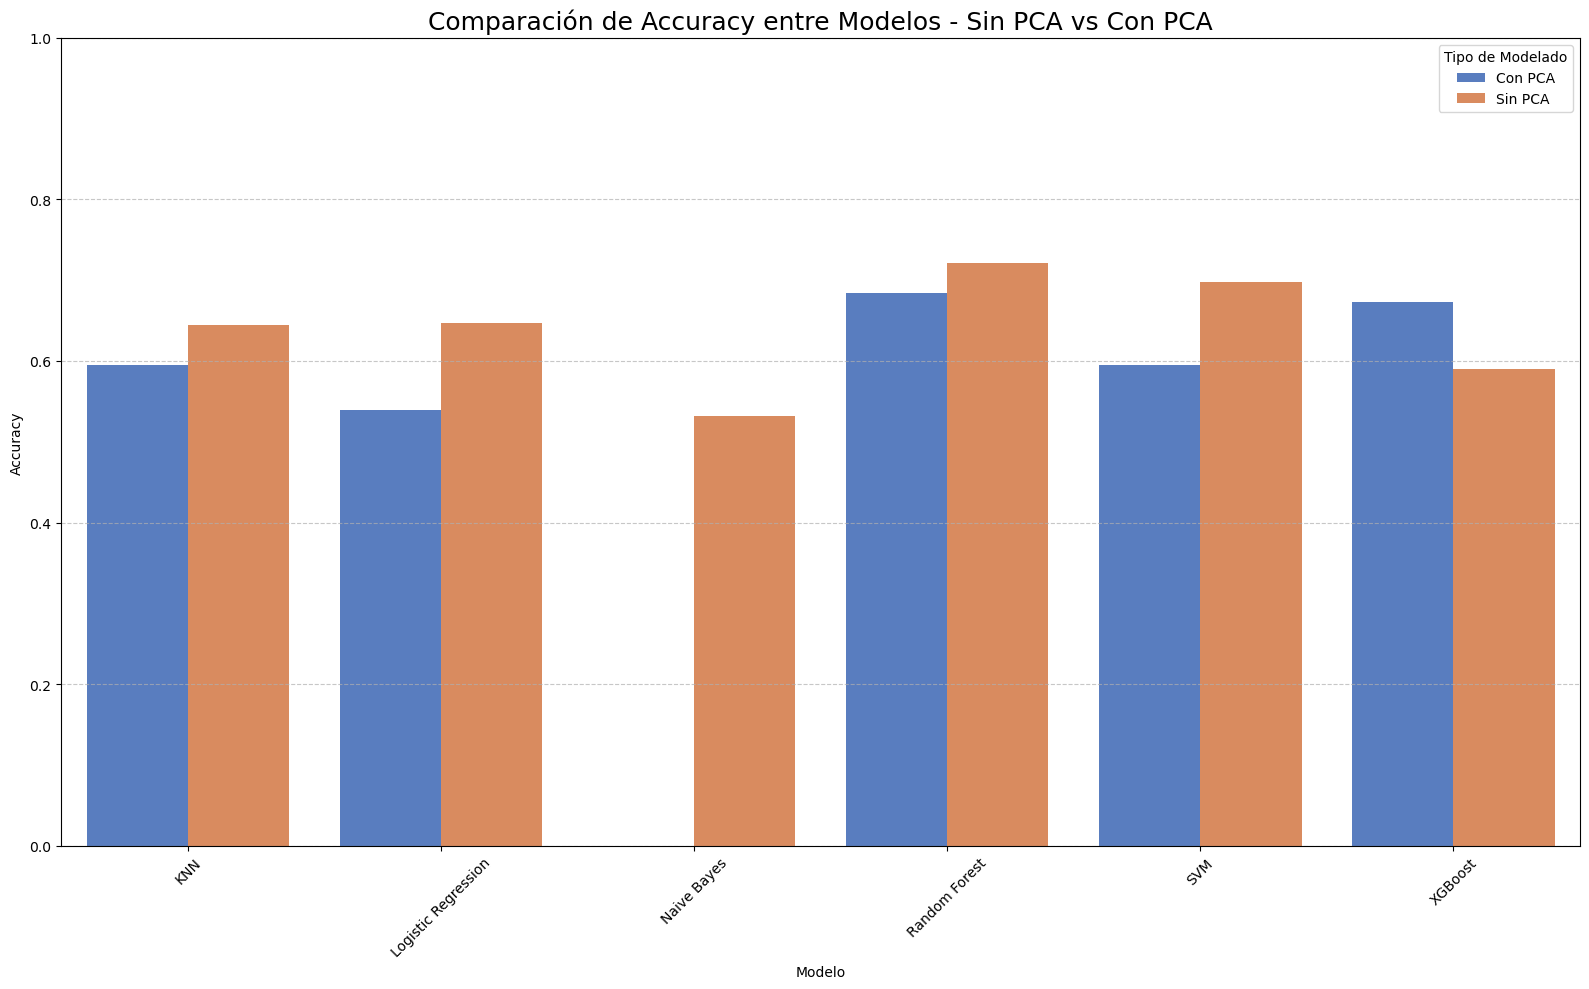

In [23]:
# gráfico combinado (Accuracy Sin PCA vs Con PCA)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Asegurarnos que los modelos estén en el mismo orden
comparacion_total = comparacion_total.sort_values(by=["Modelo", "Tipo"])

# Crear un gráfico combinado para Accuracy
plt.figure(figsize=(16,10))
sns.barplot(
    data=comparacion_total,
    x="Modelo",
    y="Accuracy",
    hue="Tipo",
    palette="muted"
)

plt.title('Comparación de Accuracy entre Modelos - Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Modelado')
plt.tight_layout()
plt.show()


In [ ]:
# Crear un gráfico combinado para F1-Score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
plt.figure(figsize=(16,10))
sns.barplot(
    data=comparacion_total,
    x="Modelo",
    y="F1-Score",
    hue="Tipo",
    palette="muted"
)

plt.title('Comparación de F1-Score entre Modelos - Sin PCA vs Con PCA', fontsize=18)
plt.xlabel('Modelo')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Modelado')
plt.tight_layout()
plt.show()


In [25]:
# Crear la tabla resumen combinada
tabla_final = comparacion_total.copy()

# Pasar Accuracy y F1-Score a porcentaje
tabla_final['Accuracy (%)'] = (tabla_final['Accuracy'] * 100).round(2)
tabla_final['F1-Score (%)'] = (tabla_final['F1-Score'] * 100).round(2)

# Seleccionar y reordenar columnas
tabla_final = tabla_final[['Modelo', 'Tipo', 'Accuracy (%)', 'F1-Score (%)', 'Tiempo de Entrenamiento (s)']]

# Mostrar tabla final
print("\nTabla Resumen Final:")
print(tabla_final)



Tabla Resumen Final:
                Modelo     Tipo  Accuracy (%)  F1-Score (%)  \
4                  KNN  Con PCA         59.49         58.49   
5                  KNN  Sin PCA         64.49         66.00   
0  Logistic Regression  Con PCA         53.97         49.83   
1  Logistic Regression  Sin PCA         64.74         60.80   
0          Naive Bayes  Sin PCA         53.21         46.53   
1        Random Forest  Con PCA         68.46         66.91   
2        Random Forest  Sin PCA         72.18         70.73   
3                  SVM  Con PCA         59.49         56.01   
4                  SVM  Sin PCA         69.74         67.15   
2              XGBoost  Con PCA         67.31         65.87   
3              XGBoost  Sin PCA         58.97         56.52   

   Tiempo de Entrenamiento (s)  
4                     0.000000  
5                     0.004000  
0                     0.381875  
1                     1.334258  
0                     0.040383  
1                     8

In [ ]:
#aplicacion smote
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
# --- 0. Filtrar clases que tengan al menos 6 ejemplos ---
conteo_clases = data_filtrado['SubRubro_encoded_relabel'].value_counts()
clases_validas = conteo_clases[conteo_clases >= 6].index
data_filtrado = data_filtrado[data_filtrado['SubRubro_encoded_relabel'].isin(clases_validas)]

print(f"Número de clases después del filtrado: {data_filtrado['SubRubro_encoded_relabel'].nunique()} clases")

# --- 1. Vectorizar de nuevo los datos filtrados ---
X_full = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y_full = data_filtrado['SubRubro_encoded_relabel']

# --- 2. Aplicar PCA (100 componentes) ---
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_full)

# --- 3. Definir modelos ---
# --- 3. Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
   # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', num_class=75),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- 4. Inicializar lista de resultados ---
resultados_smote = []

# --- 5. Ejecutar para Sin PCA y Con PCA ---
for tipo, X_data in [('Sin PCA', X_full), ('Con PCA', X_pca)]:
    
    # Separar en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_full, test_size=0.2, random_state=42, stratify=y_full
    )
    
    # Aplicar SMOTE solo en el set de entrenamiento
    sm = SMOTE(k_neighbors=2, random_state=42)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    
    # Entrenar y evaluar cada modelo
    for nombre, modelo in modelos.items():
        
        if tipo == 'Con PCA' and nombre == 'Naive Bayes':
            continue
        
        print(f"Entrenando {nombre} ({tipo})...")
        
        inicio = time.time()
        modelo.fit(X_train_smote, y_train_smote)
        fin = time.time()
        
        tiempo_entrenamiento = fin - inicio
        y_pred = modelo.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        resultados_smote.append({
            'Modelo': nombre,
            'Tipo': tipo,
            'Accuracy': acc,
            'F1-Score': f1,
            'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
        })

# --- 6. Crear DataFrame de resultados ---
resultados_smote_df = pd.DataFrame(resultados_smote)

# --- 7. Mostrar tabla final ---
print("\nTabla Comparativa: Modelos aplicando SMOTE (Sin PCA vs Con PCA)")
print(resultados_smote_df.round(4))



In [23]:
#volver a intentar pero con xgboosts
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# --- 0. Filtrar clases que tengan al menos 6 ejemplos ---
conteo_clases = data_filtrado['SubRubro_encoded_relabel'].value_counts()
clases_validas = conteo_clases[conteo_clases >= 6].index
data_filtrado = data_filtrado[data_filtrado['SubRubro_encoded_relabel'].isin(clases_validas)]

print(f"Número de clases después del filtrado: {data_filtrado['SubRubro_encoded_relabel'].nunique()} clases")

# --- 1. Vectorizar de nuevo los datos filtrados ---
X_full = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y_full = data_filtrado['SubRubro_encoded_relabel']

# --- 2. Aplicar PCA (100 componentes) ---
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_full)

# --- 3. Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),  # No necesitas num_class manual aquí
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- 4. Inicializar lista de resultados ---
resultados_smote = []

# --- 5. Ejecutar para Sin PCA y Con PCA ---
for tipo, X_data in [('Sin PCA', X_full), ('Con PCA', X_pca)]:
    
    # Separar en train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_data, y_full, test_size=0.2, random_state=42, stratify=y_full
    )
    
    # Aplicar SMOTE solo en el set de entrenamiento
    sm = SMOTE(k_neighbors=2, random_state=42)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

    # Relabelar dinámicamente para XGBoost
    le = LabelEncoder()
    y_train_smote_relabel = le.fit_transform(y_train_smote)
    y_test_relabel = le.transform(y_test)  # Transformar también y_test para XGBoost
    
    # Entrenar y evaluar cada modelo
    for nombre, modelo in modelos.items():
        
        if tipo == 'Con PCA' and nombre == 'Naive Bayes':
            continue
        
        print(f"Entrenando {nombre} ({tipo})...")
        
        inicio = time.time()
        
        if nombre == 'XGBoost':
            modelo.fit(X_train_smote, y_train_smote_relabel)
            y_pred = modelo.predict(X_test)
            y_pred = le.inverse_transform(y_pred)  # Volver a las etiquetas originales
        else:
            modelo.fit(X_train_smote, y_train_smote)
            y_pred = modelo.predict(X_test)
        
        fin = time.time()
        
        tiempo_entrenamiento = fin - inicio
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        resultados_smote.append({
            'Modelo': nombre,
            'Tipo': tipo,
            'Accuracy': acc,
            'F1-Score': f1,
            'Tiempo de Entrenamiento (s)': tiempo_entrenamiento
        })

# --- 6. Crear DataFrame de resultados ---
resultados_smote_df = pd.DataFrame(resultados_smote)

# --- 7. Mostrar tabla final ---
print("\nTabla Comparativa: Modelos aplicando SMOTE (Sin PCA vs Con PCA)")
print(resultados_smote_df.round(4))


Número de clases después del filtrado: 75 clases
Entrenando Naive Bayes (Sin PCA)...
Entrenando Logistic Regression (Sin PCA)...
Entrenando Random Forest (Sin PCA)...
Entrenando XGBoost (Sin PCA)...


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Entrenando SVM (Sin PCA)...


KeyboardInterrupt: 

In [ ]:
#aplicacion de cross validation sin pca y con smote
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# --- Datos de entrada (sin PCA, solo TF-IDF) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- Definir los modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- Configurar Stratified K-Fold ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Resultados ---
resultados_cv = []

# --- Evaluar cada modelo ---
for nombre, modelo in modelos.items():
    
    print(f"Validando {nombre}...")
    
    accuracies = []
    f1_scores = []
    tiempos = []
    
    # Cross-validation
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Aplicar SMOTE solo en el set de entrenamiento
        sm = SMOTE(k_neighbors=2, random_state=42)
        X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
        
        # Entrenar modelo
        inicio = time.time()
        try:
            modelo.fit(X_train_smote, y_train_smote)
            y_pred = modelo.predict(X_test)
            fin = time.time()
            
            # Métricas
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            accuracies.append(acc)
            f1_scores.append(f1)
            tiempos.append(fin - inicio)
        
        except Exception as e:
            print(f"Error en modelo {nombre}: {e}")
            accuracies.append(np.nan)
            f1_scores.append(np.nan)
            tiempos.append(np.nan)
    
    # Guardar resultados promedio
    resultados_cv.append({
        'Modelo': nombre,
        'Accuracy Promedio': np.nanmean(accuracies),
        'F1-Score Promedio': np.nanmean(f1_scores),
        'Tiempo Promedio de Entrenamiento (s)': np.nanmean(tiempos)
    })

# --- Crear DataFrame de resultados ---
resultados_cv_df = pd.DataFrame(resultados_cv)

# --- Mostrar tabla final ---
print("\nTabla de Resultados de Cross-Validation (5-Fold) con SMOTE")
print(resultados_cv_df.round(4))



In [22]:
#MATRIZ DE CONFUSION SOBRE LOS MODELOS - NO
#Aplica SMOTE correctamente solo en entrenamiento.
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE

# --- Datos de entrada (sin PCA) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- Split final Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Aplicar SMOTE solo en el set de entrenamiento ---
sm = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# --- Función para graficar la matriz de confusión ---
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {title}')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores Reales')
    plt.show()

# --- Entrenar y graficar cada modelo ---
for nombre, modelo in modelos.items():
    print(f"Entrenando y evaluando {nombre}...")
    
    try:
        modelo.fit(X_train_smote, y_train_smote)
        y_pred = modelo.predict(X_test)
        
        plot_confusion_matrix(y_test, y_pred, nombre)
    
    except Exception as e:
        print(f"Error con modelo {nombre}: {e}")


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

In [18]:
#Debido a que algunos pliegues de entrenamiento pueden no contener todas las clases originales, 
#fue necesario configurar explícitamente 
#el número de clases en el modelo XGBoost para evitar inconsistencias durante la etapa de entrenamiento
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# --- 1. Datos de entrada (sin PCA) ---
X = tfidf_vectorizer.transform(data_filtrado['Nombre_Limpio']).toarray()
y = data_filtrado['SubRubro_encoded_relabel']

# --- 2. Definir modelos ---
modelos = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
     'XGBoost': XGBClassifier(    
        use_label_encoder=False,
        eval_metric='mlogloss',
        objective='multi:softmax',
        num_class=75
    ),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# --- 3. Separar en Train/Test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Aplicar SMOTE solo en el Train ---
sm = SMOTE(k_neighbors=2, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# --- 5. Entrenar, predecir y graficar para cada modelo ---
for nombre, modelo in modelos.items():
    print(f"\nEntrenando y evaluando {nombre}...")

    try:
        modelo.fit(X_train_smote, y_train_smote)
        y_pred = modelo.predict(X_test)

        # --- 6. Crear clasificación binaria: correcto (1) / incorrecto (0) ---
        y_test_binario = (y_test == y_pred).astype(int)  # 1 si predijo bien, 0 si mal
        y_pred_binario = np.ones_like(y_pred)  # modelo "asume" predicción correcta para evaluación

        # --- 7. Matriz de confusión binaria ---
        cm = confusion_matrix(y_test_binario, y_pred_binario)

        # --- 8. Graficar matriz ---
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Mal clasificado", "Bien clasificado"])
        disp.plot(cmap="Blues", values_format='d')
        plt.title(f"Matriz de Confusión Binaria - {nombre}")
        plt.show()

    except Exception as e:
        print(f"Error con modelo {nombre}: {e}")



ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

In [45]:
#precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Inicializar lista de resultados
metricas_resultados = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    print(f"\nEntrenando y evaluando {nombre}...")
    
    try:
        modelo.fit(X_train_smote, y_train_smote)
        y_pred = modelo.predict(X_test)
        
        # Calcular métricas
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metricas_resultados.append({
            'Modelo': nombre,
            'Precisión': precision,
            'Recall': recall,
            'F1-Score': f1
        })
    
    except Exception as e:
        print(f"Error con modelo {nombre}: {e}")

# Crear DataFrame de métricas
metricas_df = pd.DataFrame(metricas_resultados)

# Mostrar tabla
print("\nTabla de Precisión, Recall y F1-Score por modelo:")
print(metricas_df.round(4))



Entrenando y evaluando Naive Bayes...

Entrenando y evaluando Logistic Regression...

Entrenando y evaluando Random Forest...

Entrenando y evaluando XGBoost...
Error con modelo XGBoost: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74], got [  0   3   4   5   6   7   8  11  12  13  15  16  17  21  22  25  29  30
  32  33  34  35  36  37  40  41  42  43  45  46  48  49  50  51  55  57
  58  59  60  61  62  64  65  66  67  68  69  70  71  72  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  92  94  97  98  99 100
 101 103 104]

Entrenando y evaluando SVM...

Entrenando y evaluando KNN...

Tabla de Precisión, Recall y F1-Score por modelo:
                Modelo  Precisión  Recall  F1-Score
0          Naive Bayes     0.7381  0.6439  

In [ ]:
#Primer ejemplo: Ajuste de Hiperparámetros para Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo base
modelo_base = LogisticRegression(max_iter=1000, random_state=42)

# Definir la grilla de hiperparámetros a probar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inversa de la regularización (más grande -> menos regularización)
    'penalty': ['l2'],             # Tipo de penalización (L2 = Ridge)
    'solver': ['lbfgs', 'saga']     # Métodos de optimización
}

# Crear el objeto GridSearch
grid_search = GridSearchCV(
    modelo_base,
    param_grid,
    cv=5,                           # 5-fold cross-validation
    scoring='f1_weighted',           # Maximizar F1 ponderado (multiclase)
    verbose=2,
    n_jobs=-1                        # Usa todos los núcleos
)

# Ajustar el modelo
grid_search.fit(X_train_smote, y_train_smote)

# Mejor combinación encontrada
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Mejor score obtenido
print("Mejor F1-Score ponderado:", grid_search.best_score_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Modelo base
#modelo_logreg = LogisticRegression(max_iter=1000, random_state=42)
modelo_logreg = LogisticRegression(max_iter=10, random_state=42)

# Hiperparámetros
param_dist_logreg = {
    'C': [0.1, 1, 10],
     'solver': ['saga']
    #'solver': ['lbfgs', 'saga']
}

# Randomized Search
random_search_logreg = RandomizedSearchCV(
    modelo_logreg,
    param_distributions=param_dist_logreg,
    n_iter=2,        # 4 combinaciones
    cv=3,            # 3 folds para rapidez
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Ajuste
random_search_logreg.fit(X_train_smote, y_train_smote)

print("\nMejores parámetros Logistic Regression:")
print(random_search_logreg.best_params_)
print("Mejor F1-Score ponderado:", random_search_logreg.best_score_)


NameError: name 'X_train_smote' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Modelo base
#modelo_logreg = LogisticRegression(max_iter=1000, random_state=42)
modelo_logreg = LogisticRegression(max_iter=10, random_state=42)

# Hiperparámetros
param_dist_logreg = {
    'C': [0.1, 1, 5],
     'solver': ['saga']
    #'solver': ['lbfgs', 'saga']
}

# Randomized Search
random_search_logreg = RandomizedSearchCV(
    modelo_logreg,
    param_distributions=param_dist_logreg,
    n_iter=2,        # 4 combinaciones
    cv=2,            # 3 folds para rapidez
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Ajuste
random_search_logreg.fit(X_train_smote, y_train_smote)

print("\nMejores parámetros Logistic Regression:")
print(random_search_logreg.best_params_)
print("Mejor F1-Score ponderado:", random_search_logreg.best_score_)

In [26]:
conteo_subrubros_top = conteo_subrubros.head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_subrubros_top.values, y=conteo_subrubros_top.index, palette="viridis")
plt.title('Top 15 Rubros más frecuentes', fontsize=16)
plt.xlabel('Cantidad de Productos')
plt.ylabel('SubRubro')
plt.tight_layout()
plt.grid(axis='x')
plt.show()


NameError: name 'conteo_subrubros' is not defined

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest rápido
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions={
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    n_iter=5,       # Solo 5 combinaciones
    cv=2,           # Solo 2 folds
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Entrenamiento
random_search_rf.fit(X_train_smote, y_train_smote)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


MemoryError: Unable to allocate 484. MiB for an array with shape (17588, 3610) and data type float64

In [25]:
#regresion logistica con ajuste de parametros
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear modelo con parámetros elegidos
modelo_logreg = LogisticRegression(
    C=1,               # Regularización moderada
    penalty='l2',      # Penalización L2
    solver='saga',     # Solver rápido para TF-IDF
    max_iter=300,      # Iteraciones suficientes
    random_state=42
)

# Entrenar modelo
modelo_logreg.fit(X_train_smote, y_train_smote)

# Predecir en conjunto de validación
y_pred = modelo_logreg.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-Score (weighted): {f1:.4f}")


Accuracy: 0.7411
Precision (weighted): 0.7445
Recall (weighted): 0.7411
F1-Score (weighted): 0.7329


In [27]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Usaremos el set vectorizado (sin SMOTE)
X_for_lof = X_full  # TF-IDF

# Crear el modelo LOF
lof = LocalOutlierFactor(
    n_neighbors=20,    # Número de vecinos a considerar (puede probarse 10, 20, 30)
    contamination=0.05 # Estimación inicial: se espera que el 5% sean outliers
)

# Ajustar el modelo y predecir
y_lof_pred = lof.fit_predict(X_for_lof)

# Interpretación:
# -1 = outlier (anómalo)
#  1 = inlier (normal)

# Agregar la predicción al dataset
data_filtrado['LOF_Prediccion'] = y_lof_pred

# Mostrar conteo
print(data_filtrado['LOF_Prediccion'].value_counts())

# Opcional: ver algunos ejemplos de outliers detectados
outliers_detectados = data_filtrado[data_filtrado['LOF_Prediccion'] == -1]
print("\nAlgunos productos detectados como atípicos por LOF:")
print(outliers_detectados[['Nombre', 'Descripcion']].head(10))


LOF_Prediccion
 1    3612
-1     191
Name: count, dtype: int64

Algunos productos detectados como atípicos por LOF:
                                                Nombre  \
29                                        TONER AL 21%   
62   TALADRO MOD HP 2050                           ...   
71   PELA CABLE PROSKIT 8PK-CT001                  ...   
93   NOTEBOOK 02 HP MOD: TPN-I119                  ...   
116  COMPUTADORA INTEL I5 GABINTE SFX MEMORIA 8GB  ...   
229           PATCH PANEL CAT 6A - 24P (cargado)         
231  PATCH PANEL CAT 5E - 24P- RJ45 - "KLINE" "KOMP...   
232  PATCH PANEL CAT 6 - 24P - RJ45 - "KLINE" "KOMP...   
272  FUTP CAT 5E                                   ...   
273  FUTP CAT 5E FURUKAWA                          ...   

                                           Descripcion  
29                                        TONER AL 21%  
62                                                 NaN  
71                                                 NaN  
93               

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\379656913.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")


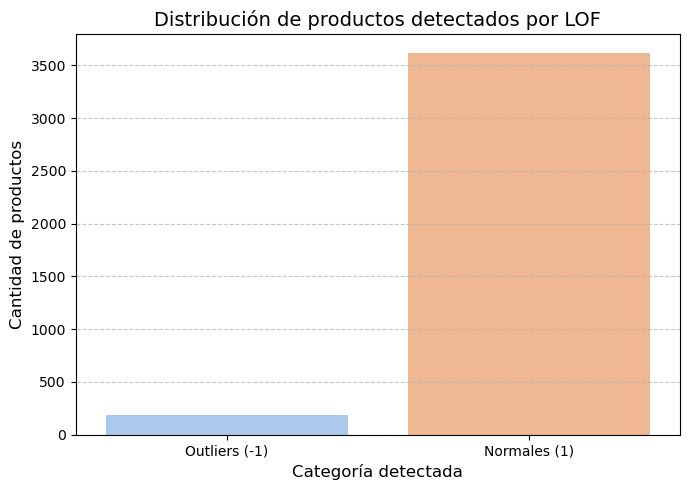

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponemos que ya ejecutaste esto antes:
# data_filtrado['LOF_Prediccion']  # -1 = outlier, 1 = normal

# Contar la cantidad de normales y outliers
conteo_lof = data_filtrado['LOF_Prediccion'].value_counts().sort_index()
conteo_lof.index = ['Outliers (-1)', 'Normales (1)']  # Etiquetas más claras

# Crear gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(x=conteo_lof.index, y=conteo_lof.values, palette="pastel")

# Títulos y etiquetas
plt.title("Distribución de productos detectados por LOF", fontsize=14)
plt.ylabel("Cantidad de productos", fontsize=12)
plt.xlabel("Categoría detectada", fontsize=12)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [29]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# Usamos el mismo conjunto que para LOF
X_for_dbscan = X_full  # TF-IDF

# Crear modelo DBSCAN
dbscan = DBSCAN(
    eps=1.5,          # Distancia máxima entre dos puntos para ser vecinos (ajustable)
    min_samples=5,    # Mínimo número de puntos en un vecindario para formar un cluster
    metric='cosine'   # Métrica para TF-IDF (coseno funciona mejor que euclidiana)
)

# Ajustar y predecir
dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Interpretación:
# -1 = ruido (outlier)
# 0, 1, 2, ... = clusters encontrados

# Agregar la predicción al DataFrame
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# Mostrar conteo de outliers y clusters
print(data_filtrado['DBSCAN_Cluster'].value_counts().sort_index())

# Opcional: ver algunos ejemplos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


DBSCAN_Cluster
0    3803
Name: count, dtype: int64

Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


Cantidad de clusters encontrados: 1
Cantidad de productos detectados como ruido (outliers): 0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\2299874641.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


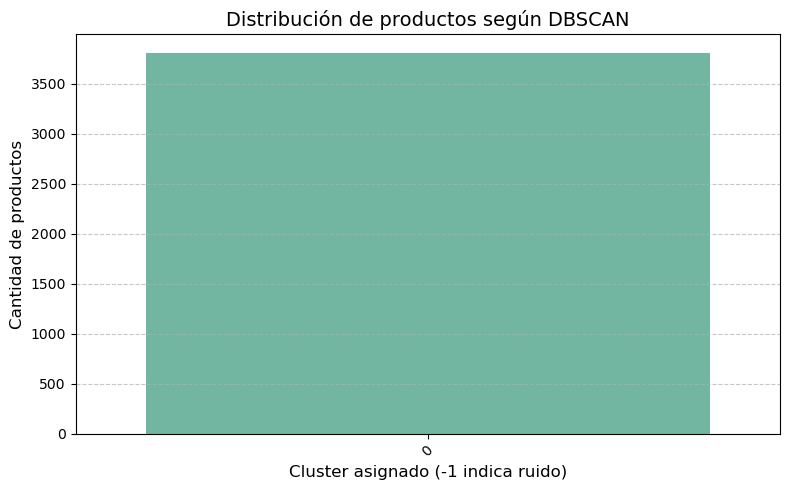


Algunos productos detectados como ruido por DBSCAN:
Empty DataFrame
Columns: [Nombre, Descripcion]
Index: []


In [30]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=1.5,           # Distancia máxima entre vecinos
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


Cantidad de clusters encontrados: 49
Cantidad de productos detectados como ruido (outliers): 1302


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17268\741985207.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')


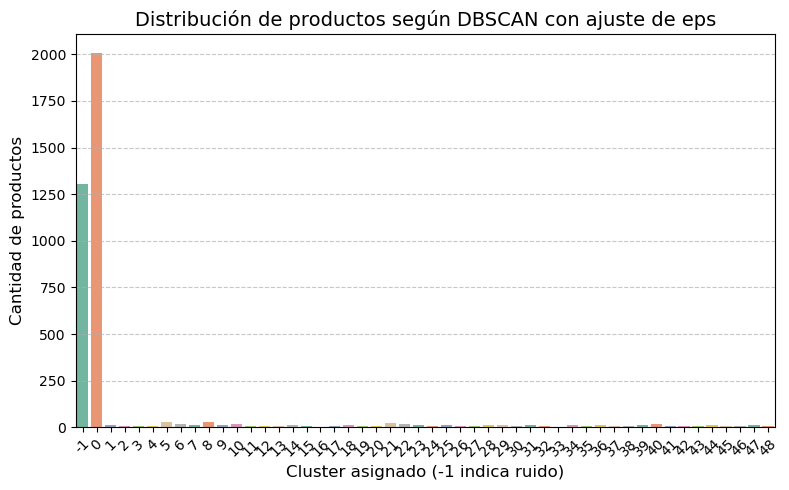


Algunos productos detectados como ruido por DBSCAN:
                                               Nombre  \
3                          COMBUSTIBLES Y LUBRICANTES   
7                                              RESMAS   
8                                           PAPELERÍA   
18                                              TOKEN   
26                     ELECTRODOMÉSTICOS P/LA EMPRESA   
28                                          CAFETERAS   
31                                      TELEVISOR LED   
37                                          REPUESTOS   
43                                       BATERÍAS UPS   
45  MATA CUCARACHAS                               ...   

                               Descripcion  
3             COMBUSTIBLES Y LUBRINCANTES.  
7                             RESMAS AUTOR  
8                          PAPELES- HOJAS.  
18                          TOKEN E CRYPTO  
26  ELECTRODOMÉSTICOS P/ USO DE LA EMPRESA  
28          CAFETERAS P/ USO DE LA EMPRESA  
31  

In [34]:
#Debemos bajar el valor de eps para que DBSCAN sea más estricto.
# eps=0.3,       # Mucho más estricto
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aplicar DBSCAN
X_for_dbscan = X_full  # TF-IDF sin PCA

dbscan = DBSCAN(
    eps=0.6,       # Mucho más estricto
    min_samples=5,     # Mínimo número de vecinos
    metric='cosine'    # Métrica adecuada para vectores TF-IDF
)

dbscan_labels = dbscan.fit_predict(X_for_dbscan)

# Agregar los resultados al dataset
data_filtrado['DBSCAN_Cluster'] = dbscan_labels

# 2. Conteo de resultados
conteo_dbscan = data_filtrado['DBSCAN_Cluster'].value_counts().sort_index()

# Separar cantidad de ruido y clusters
n_ruido = (conteo_dbscan.index == -1).sum()
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Cantidad de clusters encontrados: {n_clusters}")
print(f"Cantidad de productos detectados como ruido (outliers): {(dbscan_labels == -1).sum()}")

# 3. Gráfico de barras de Clusters y Ruido
plt.figure(figsize=(8, 5))
sns.countplot(x='DBSCAN_Cluster', data=data_filtrado, palette='Set2')
plt.title('Distribución de productos según DBSCAN con ajuste de eps', fontsize=14)
plt.xlabel('Cluster asignado (-1 indica ruido)', fontsize=12)
plt.ylabel('Cantidad de productos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Opcional: ver ejemplos de productos detectados como ruido
outliers_dbscan = data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1]
print("\nAlgunos productos detectados como ruido por DBSCAN:")
print(outliers_dbscan[['Nombre', 'Descripcion']].head(10))


In [35]:
# Filtrar productos detectados como outliers en LOF y DBSCAN
outliers_ambos = data_filtrado[
    (data_filtrado['LOF_Prediccion'] == -1) & (data_filtrado['DBSCAN_Cluster'] == -1)
]

# Mostrar algunos ejemplos
print("Productos detectados como atípicos por ambos algoritmos:")
print(outliers_ambos[['Nombre', 'Descripcion']].head(10))

# Mostrar cantidad
print(f"\nCantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: {outliers_ambos.shape[0]}")


Productos detectados como atípicos por ambos algoritmos:
                                                 Nombre Descripcion
71    PELA CABLE PROSKIT 8PK-CT001                  ...         NaN
331   BOBINA UTP CAT 6 (EN MT SUELTO)               ...   CABLE UTP
676                        PELA CABLE PROSKIT 8PK-CT001  PELA CABLE
731   TENAZA CARPINTERO CARPINTERO N8               ...      TENAZA
770   JABALINA AC-COBR 1.5MTS- 3/8" C-TOMAC C-SELLO-...    JABALINA
970   EXTENSION M22 320 MM                          ...         NaN
1109  CART. HP CO. N°93                             ...    C9361TRI
1110  CART. HP NE. N°92                             ...     C9362WL
1139  CARTUCHO HP 662 XL NEGRO                      ...         NaN
1140  CARTUCHO HP 662 XL COLOR                      ...         NaN

Cantidad de productos detectados como outliers por LOF y DBSCAN simultáneamente: 71


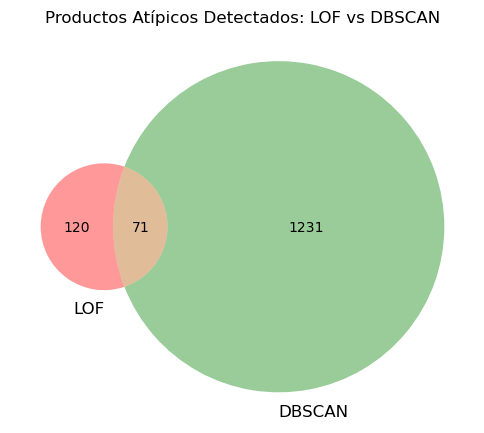

In [37]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

#  ya existan de tu análisis previo
# data_filtrado['LOF_Prediccion']  # de LOF
# data_filtrado['DBSCAN_Cluster']  # de DBSCAN

# Crear conjuntos de índices
outliers_lof = set(data_filtrado[data_filtrado['LOF_Prediccion'] == -1].index)
outliers_dbscan = set(data_filtrado[data_filtrado['DBSCAN_Cluster'] == -1].index)

# Calcular cantidades
solo_lof = len(outliers_lof - outliers_dbscan)
solo_dbscan = len(outliers_dbscan - outliers_lof)
ambos = len(outliers_lof & outliers_dbscan)

# Dibujar gráfico de Venn
plt.figure(figsize=(6, 6))
venn2(subsets=(solo_lof, solo_dbscan, ambos), set_labels=('LOF', 'DBSCAN'))
plt.title('Productos Atípicos Detectados: LOF vs DBSCAN')
plt.show()
